# 미분

* 연쇄법칙
    - F(x) = f(g(x)) , F'(x) = f'(g(x()) * g'(x)
    - y = f(u), u = g(x) 일때 f(u)의 도함수는 dy/dx = dy/du * du/dx
     
* 머신러닝에서 미분은 퍼셉트론

* 퍼셉트론 y = wx + b, 손실함수( 평균 제곱 오차, MSE), 경사 하강법
    - 양의 오차, - 오차가 존재 이 오차를 줄이는 것이 목표
    - 손실함수 또는 목적함수
    - 손실함수를 최소화하기 위해 제곱하여 평균을 낸다
    - 퍼셉트론 손실함수 : L = 1/n * sum(y - p)^2, L은 x, w에대해 2차방정식 형태
    - 손실함수가 가장 적어지는 w를 구하는 것이 목표
    - 컴퓨터는 p는 현재 예측값이기 때문에 구할 수 있지만 y를 알지 못한다. L이 최소가되는 w를 한번에 구하지 못한다.
    - 현재값의 기울기는 알 수 있다. 기울기가 +라면 0을향해 -, -라면 0을향해 - 
    - 경사 하강법
        - W new = W old - dL/dw 
        - = W old - 2*x*w
        - 새로운 가중치는 이전 가중치에 손실함수에대해 w로 미분한 값(기울기)을 빼준것.
        - b new = b old - dL/dw = b old - b

* 편미분과 기울기 벡터
    - 손실함수, w, b 3차원 그래프에서 w는 w방향으로만 미분한 값을 반영, b는 b방향으로만 미분간 값을 반영하면 손실함수가 최소가 되는 값을 찾을 수 있다.

* 학습률
    - eta, 기울기 벡터의 크기를 얼마나 고려하여 이동할지 결정
    
* 퍼셉트론 최종 : w' = w - eta * L 기울기

* 경사하강법으로 구한 최소값
    - 지역 최소값 : 특정범위내에, 전역 최소값 : 전체 공간에서
    - 컴퓨터는 전역인지 지역인지 알지 못한다.
    - local에 빠지지 않기위한 여러가지 해결법
        - 1. 학습률 조절을 통해 local에서 빠져오도록 하는 것
        - 2. 경사하강법에 관성을 추가해 진행방향의 반대값을 만나도 진행방향으로 조금 더 변화를 주는 것
            - w1 = w0 - 학습률 * L 기울기0, 
            - w2 = w1 - 학습률 * L 기울기1 - 학습률/n * L 기울기0 (L0 방향으로 n만큼 나눈 값을 더해준다.)
            
* 과적합, 과소적합, 일반화
    - 과적합 : 일반화가 제대로 되지 않았다. (과하게 적합됐다.)
        - 학습에 사용된 데이터 수가 너무 적다.
        - 데이터를 설명하기 위해 사용된 곡선(모델, 퍼셉트론)이 너무 복잡하다.
        - 데이터수에 비해 모델이 너무 복잡했다.
            - 해결책 
            - 모델이 지나치게 복잡하지 않게 규제 (손실함수에 페널티(페널티항, 규제항)를 추가)
            - 규제항을 만드는 방법 
    - 과소적합 : 학습이 덜 이루어져 새로운 데이터뿐만 아니라 학습 데이터조차 제대로 설명하지 못한다.
        - 모델이 지나치게 단순
        - 데이터가 지나치게 적음
    
        
    

In [54]:
# 로지스틱회귀

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

# 4개 특성, 1개 정답, 150개 데이터
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
label = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}

In [56]:
X = iris.iloc[:, :4].values # 4특성을 가진 150개, 150 x 4 행렬
y = iris.iloc[:, 4].map(label).values # 1 정답을 가진 150개, 150 x 1 행렬

# 4 특징 중 Length 2개 특징만 사용
X = X[:, [0, 2]]

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

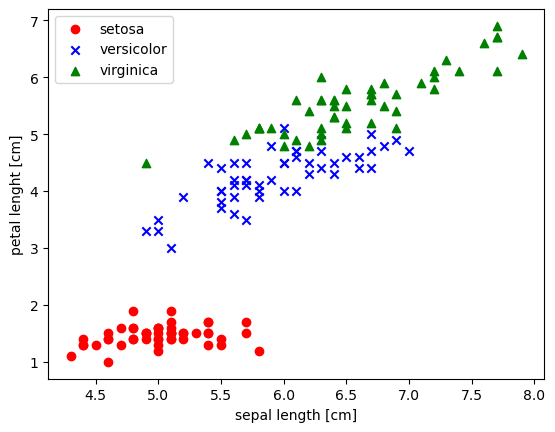

In [14]:
plt.figure()

# x축을 sepal length, y축을 petal length

plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color = 'green', marker = '^', label = 'virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')

plt.legend()
plt.show()

In [15]:
# 3차원 그리기 

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02): # classifier 분류기, 모델, 퍼셉트론

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface 잘린 공간 표현
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 공간 색칠
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


C:\Users\PC\AppData\Local\Temp\ipykernel_4500\1545675336.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_4500\1545675336.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


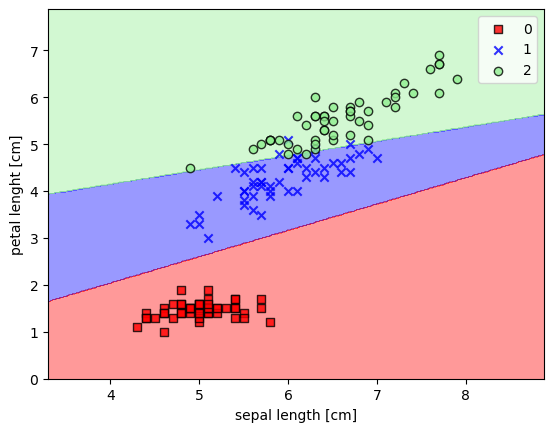

In [22]:
# 데이터 2개를 나누는 것 : 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 100, random_state = 1)
# solver : 해를 찾는 것, 어떻게 찾을 것인가, multi_calss : 몇개를 찾을 것있지, C : 가운데를 어떻게 찾을 것인지, random_state : 랜덤 가중치

lr.fit(X, y)

plot_decision_regions(X, y, lr)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')

plt.legend()
plt.show()

# 선형 회귀로 이해하는 지도학습

* 회귀모델 : 회귀 분석은 대표적인 지도 알고리즘
    - 관측된 데이터를 통해 독립변수와 종속변수 사이의 숨어있는 관계를 추정하는 것
* 선형회귀 : y = f(x)에서 입력 x에 대응하는 실수 y들이 주어지고 추정치 f(x)가 가진 오차를 측정
    - 이 오차를 줄이는 방향으로 함수의 계수(w)를 최적화하는 일
    - 성능 척도 P는 예측한 값(p)과 데이터로 제공되는 목표값(y)의 차이가 적을 수록 높은 점수를 부여
* 회귀분석은 데이터를 설명하는 좋은 가설을 찾는 것

* 선형회귀와 지도학습
    - 정답(y)이 있어야 손실함수(L)를 구할 수 있고 지도학습이 가능하다.
    - 선형 : 직선, 다항(비선형) : 2차이상, 
    - 분류 :
    - 

In [24]:
# 선형 회귀 예시 데이터

pol = pd.read_csv('https://github.com/dknife/ML/raw/main/data/pollution.csv')
pol

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243
...,...,...
95,0.070824,4.851617
96,0.055300,4.912696
97,0.138229,5.516441
98,0.007205,5.661260


In [37]:
X = pol['input'].values.reshape(-1, 1)
y = pol['pollution'].values.reshape(-1, 1)

In [39]:
# 선형 회귀 모델 불러오기

from sklearn.linear_model import LinearRegression

lr2 = LinearRegression() # 직선을 그어주는 단순한 모델
lr2.fit(X, y) # 학습된 후 결과 리포트

LinearRegression()

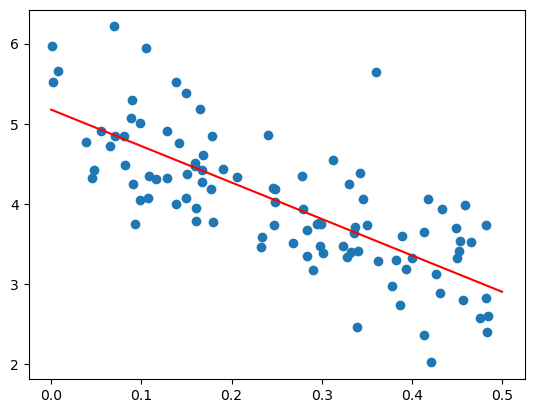

In [42]:
plt.figure()

plt.scatter(X, y)
plt.plot([0, 0.5], lr2.predict([[0], [0.5]]), color = 'red')

plt.show()

# 선형 회귀에 선형이 얼마나 표본을 잘 나타내는지 평가하는 평가지수 (손실함수와 비슷하다.)

* 1. 평균 제곱 오차 1/n * sum(y - p)^2 (MSE mean squared error)
    - 제곱을하기 때문에 오차의 크기가 얼마인지 가늠하기 어렵다.
* 2. MAE mean absolute error 1/n * sum(abs(y - p))
    - MSE에서 오차의 크기가늠이 어렵지만 MAE는 오차크기를 알 수 있다.
    - 사람들이 보는 평가지표로 쓰이고 머신러닝의 학습에는 쓰이지 않는다. (절대값은 미분이 어렵기 때문에)
* 3. RMSE root mean square error  sqrt(1/n * sum(y - p)^2)
    - 두개의 단점을 보완
    - MSE에서 제곱해서 커진 오차를 루트로 되돌린다.
* 4. R-squared 
    - 통계학에서 쓰이는 평가지수
    - 선을 기준으로 분산을 어느정도해야 점들 (데이터들)이 정규분포안으로 다 들어오는지
    - ex. 정규분포안으로 80%의 점들이 다 들어온다면 0.8점

In [52]:
# 평가지수 사용 

from sklearn.metrics import mean_squared_error, mean_absolute_error

p = lr2.predict(X)
mse = mean_squared_error(y, p)
mae = mean_absolute_error(y, p)

print(mae, mse)

0.43306411603377926 0.3097239682341083


In [59]:
from sklearn.metrics import accuracy_score

p = lr.predict(X)

accuracy_score(y, p)

0.9666666666666667

C:\Users\PC\AppData\Local\Temp\ipykernel_4500\1545675336.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_4500\1545675336.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


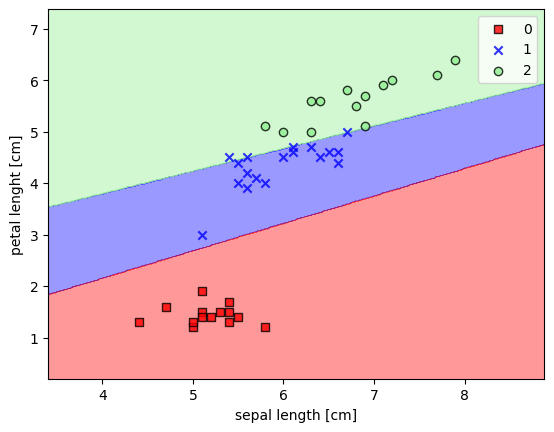

In [73]:
# 학습용 데이터와 테스터 데이터로 분할하는 작업이 필요
# X, y를 적잘한 비율로 (8:2, 7:3 을 많이사용) 나눈다.
# 데이터가 많으면 9:1, 적으면 6:4 (충분한 모집단이 필요하기 때문에) 
# train이 많을수록 좋지만 test가 모집단을 표현할 만큼 충분한 수가 필요하다.
# sklearn에 구현되어 있다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

X_train, X_test, y_train, y_test

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 100, random_state = 1)
# solver : 해를 찾는 것, 어떻게 찾을 것인가, multi_calss : 몇개를 찾을 것있지, C : 가운데를 어떻게 찾을 것인지, random_state : 랜덤 가중치

lr.fit(X_train, y_train)

# plot_decision_regions(X_train, y_train, lr)
plot_decision_regions(X_test, y_test, lr)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')

plt.legend()
plt.show()

In [74]:
p = lr.predict(X_train)
print(accuracy_score(y_train, p))

p = lr.predict(X_test)
print(accuracy_score(y_test, p))

0.9714285714285714
0.9333333333333333


In [79]:
# 다항회기
# sklearn에 따로 모델이 있지 않다. 비선형모델을 선형모델로 바꾼다. (데이터를 편다.)

from sklearn.preprocessing import PolynomialFeatures

life = pd.read_csv('https://github.com/dknife/ML/raw/main/data/life_expectancy.csv')
life

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [84]:
life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'BMI', 'Polio', 'GDP', 'Thinness 1-19 years']]

life.dropna(inplace = True)

life.isna().sum()

Life expectancy           0
Alcohol                   0
Percentage expenditure    0
BMI                       0
Polio                     0
GDP                       0
Thinness 1-19 years       0
dtype: int64

In [93]:
X = life[['Alcohol', 'Percentage expenditure', 'BMI', 'Polio', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [94]:
# train, test 분리는 생략

pf = PolynomialFeatures(degree = 3)

X = pf.fit_transform(X)

In [96]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

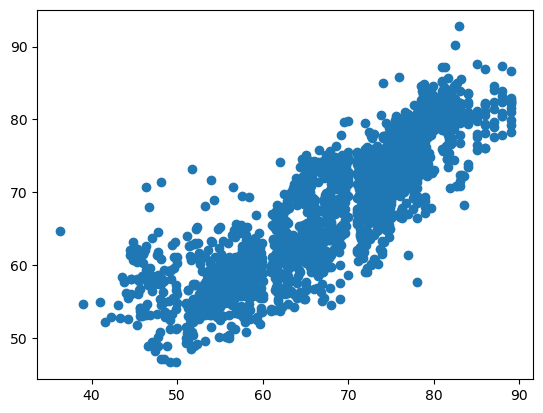

In [99]:
p = lr.predict(X)

plt.figure()

plt.scatter(y, p)

plt.show()

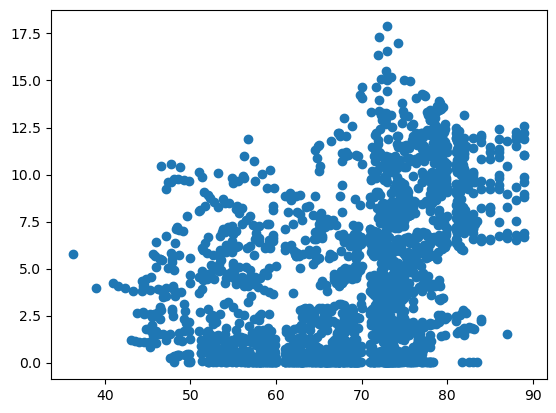

In [100]:
plt.figure()

plt.scatter(y, life['Alcohol'])

plt.show()

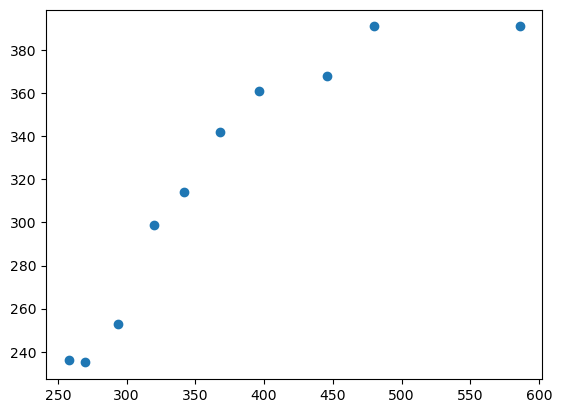

In [101]:
X = np.array([258, 270, 294, 320, 342, 368, 396, 446, 480, 586])
y = np.array([236, 235, 253, 299, 314, 342, 361, 368, 391, 391])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.figure()

plt.scatter(X, y)

plt.show()

In [109]:
# 그냥 선형 학습
lr1 = LinearRegression() 
lr1.fit(X, y)

# 다항 조절
lr2 = LinearRegression()
pf = PolynomialFeatures(degree = 2) # 원래는 차원을 알지 못한다. 적절한 파라미터 값들을 찾아나가는게 중요
X_pf = pf.fit_transform(X)
lr2.fit(X_pf, y)

LinearRegression()

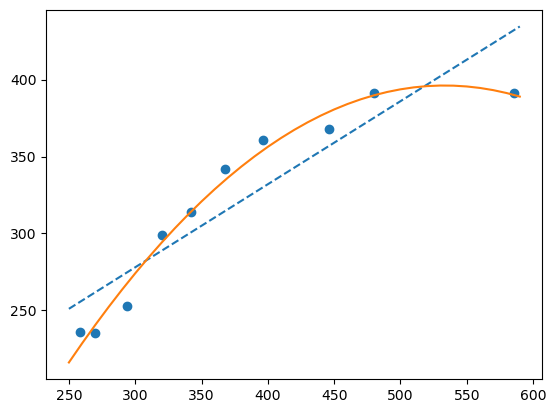

In [108]:
Xr = np.arange(250, 600, 10).reshape(-1, 1) # X축 범위

plt.figure()

plt.scatter(X, y)

plt.plot(Xr, lr1.predict(Xr), linestyle = '--')
plt.plot(Xr, lr2.predict(pf.transform(Xr)))

plt.show()